The aim of this paper is to go through Polynomial regression modle which uses multi independents and to determine the best degree for it.<br>
Dataset for used cars will be used in this model to predict car price based on some features on this Dataset 

In [1]:
# let us start import the follwing:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# using the following dataset for cars
Location = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(Location)
df.head(3)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1


In [66]:
# let us shows the correlation for each feature to select which feature/s have the significant correlation value
df.corr()

# We can see that (curb-weight,engine-size,horsepower,highway-mpg,city-L/100km) have the significant corrlation value so they will be used in this modle 

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


We already have built different types of modles and have calculated the R^2 and MSE for all of them in order to choose the proper one, please check the below img (Modle Comparison Table) which shows that Polynomail modle by using the follwoing features:(curb-weight,engine-size,horsepower,highway-mpg,city-L/100km) has the highest R^2 and the Lowest MSE so its our chioce 

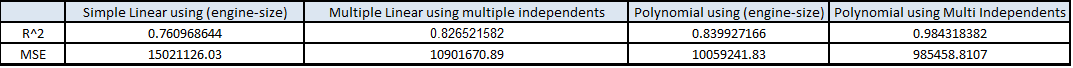

In [56]:
# code to display the Image:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "/resources/data/Modles Comparison Table.png"
Image(filename = PATH)

The Challange this papaer will address it is how to select the proper order for polynomial regression so let us go togather through the below steps:

In [75]:
# First Step: Extracting the data for the selected featuers which will be used in this modle:
Data = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','city-L/100km']]
Price = df['price']

In [59]:
# Second Step: using Elbow method to determine the proper degree (References:https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f)
from sklearn.preprocessing import MinMaxScaler

In [60]:
Stand_min = MinMaxScaler()

In [ ]:
Stand_min.fit(Data)

In [63]:
data_transformed = Stand_min.transform(Data)

In [64]:
from sklearn.cluster import KMeans

In [ ]:
Sum_of_squared_distances = []
K = range(1,Data.shape[0] + 1)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

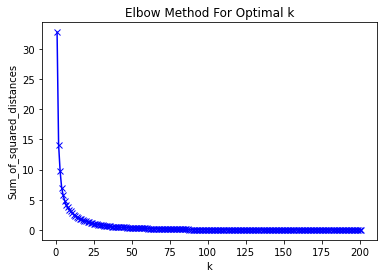

In [68]:
# Let us visulazie the results:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on above figure we can say that K in range ofrom 15 to 20 will be the best chioce for polynomial degree, we will select 18 as polynomial degree.

In [69]:
# let us build our polynomail regression now
from sklearn.preprocessing import PolynomialFeatures

In [70]:
pl = PolynomialFeatures(degree=18)

In [71]:
Data_pl = pl.fit_transform(Data)

In [ ]:
# building linear Regression by using the transformed Data(Data_pl variable)

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
Poly_Reg = LinearRegression()

In [76]:
Poly_Reg.fit(Data_pl,Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
Yhat_Poly = Poly_Reg.predict(Data_pl)

In [87]:
# Calculate the R^2
Multi_Poly = Poly_Reg.score(Data_pl,Price)
print('R^2 = ', Multi_Poly)

R^2 =  0.9843183823195976


In [88]:
# Calculate the MSE:
from sklearn.metrics import mean_squared_error
MsePolyMulti = mean_squared_error(Price, Yhat_Poly)
print('MSE = ', MsePolyMulti)

MSE =  985458.8107380256


In [85]:
# illustrate the results of model by using Distribution diagram:
import seaborn as sns
%matplotlib inline

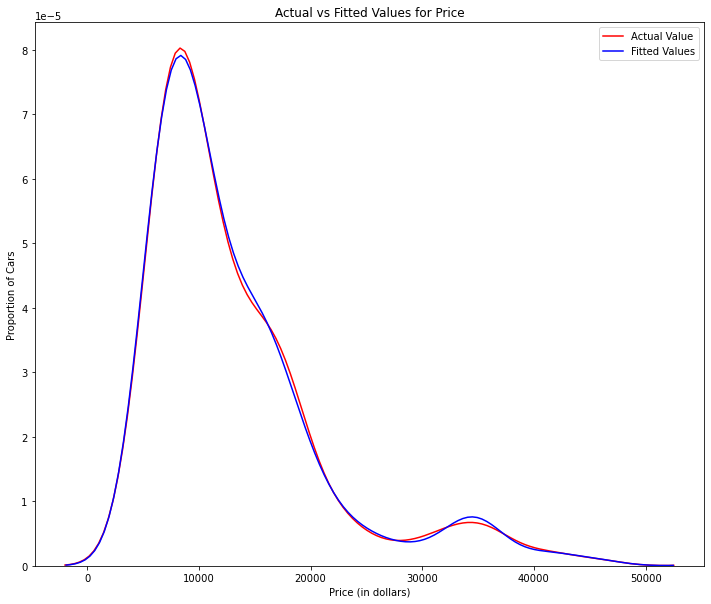

In [86]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(Price, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat_Poly, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()